<a href="https://colab.research.google.com/github/txin-y/23springNeuralNetworkProject/blob/main/TweetTextClassification_advanced.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from sklearn.model_selection import train_test_split

In [ ]:
!pip install torchdata==0.5.1 transformers


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 22.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.5/887.5 MB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.1/317.1 MB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 557.1/557.1 MB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 849.3/849.3 kB 63.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.0/21.0 MB 64.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 24.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 106.9 MB/s eta 0:00:00
  Attempting uninstall: torch
    Found existing installation: torch 2.0.0+cu118
    Uninstalling torch-2.0.0+cu118:
      Successfully uninstalled torch-2.0.0+cu118
  Attemptin

In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Load the dataset
df = pd.read_csv("/content/train.csv")
df.to_csv("/content/train.csv", index=False)

Mounted at /content/drive


# **Twitter Sentiment Analysis**
Detecting hatred tweets, provided by Analytics Vidhya
https://www.kaggle.com/datasets/arkhoshghalb/twitter-sentiment-analysis-hatred-speech

## About Dataset

### Context

The objective of this task is to detect hate speech in tweets. For the sake of simplicity, we say a tweet contains hate speech if it has a racist or sexist sentiment associated with it. So, the task is to classify racist or sexist tweets from other tweets.

Formally, given a training sample of tweets and labels, where label '1' denotes the tweet is racist/sexist and label '0' denotes the tweet is not racist/sexist, your objective is to predict the labels on the test dataset.

### Content

Full tweet texts are provided with their labels for training data.
Mentioned users' username is replaced with @user.

### Acknowledgements

Dataset is provided by Analytics Vidhya

In [ ]:
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)
train_set = train_df.drop("id", axis = 1)
test_set = test_df.drop("id", axis = 1)
train_set.head(n = 10)

,label,tweet
12110,1,@user @user @user because i've been paying att...
14081,0,@user raft building at salford quays as pa of...
1829,0,friday ð ð» #gdegblog #friday #selfie #b...
2769,0,#fashion it is a true #fact
31818,0,"so to #share the #simple, #elegant #business..."
9250,0,@user big update on @user colne uk european b...
29624,0,five minutes to google translate and print a s...
5505,0,lady_graces: berniesanders according to #gucc...
1809,0,the simple things in life make one happy #smil...
23277,0,#whoolo in film you can have sad endings. #an...


In [ ]:
from transformers import BertTokenizer
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

class TwitterDataset(Dataset):
    def __init__(self, df, max_length):
        self.df = df
        self.max_length = max_length
    
    def __len__(self):
        return len(self.df)
    
    def __getitem__(self, index):
        text = self.df.iloc[index]["tweet"]
        sentiment = self.df.iloc[index]["label"]
        # sequence = tokenizer(text, padding=True, truncation=True, max_length=self.max_length, return_tensors='pt')
        # print(sequence.input_ids.view(-1).type)
        return {
            # "input_ids": sequence.input_ids.view(-1),
            # "attention_mask": sequence.attention_mask.view(-1),
            "labels": torch.tensor(sentiment, dtype=torch.float),
            "text": text
        }
        

In [ ]:
# Convert uppercase letters to lowercase letters in "tweet" columns

from termcolor import colored

train_set["tweet"] = train_set["tweet"].apply(lambda x: " ".join(x.lower() for x in x.split()))
test_set["tweet"] = test_set["tweet"].apply(lambda x: " ".join(x.lower() for x in x.split()))

print(colored("\nCONVERTED SUCCESFULLY...", color = "green", attrs = ["dark", "bold"]))


CONVERTED SUCCESFULLY...


In [ ]:
# Delete punctuation marks from "tweet" columns

train_set["tweet"] = train_set["tweet"].str.replace('[^\w\s]','')
test_set["tweet"] = test_set["tweet"].str.replace('[^\w\s]','')

print(colored("\nDELETED SUCCESFULLY...", color = "green", attrs = ["dark", "bold"]))

<ipython-input-7-916bebbe22d8>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  train_set["tweet"] = train_set["tweet"].str.replace('[^\w\s]','')



DELETED SUCCESFULLY...


<ipython-input-7-916bebbe22d8>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  test_set["tweet"] = test_set["tweet"].str.replace('[^\w\s]','')


In [ ]:
# Delete numbers from "tweet" columns

train_set['tweet'] = train_set['tweet'].str.replace('\d','')
test_set['tweet'] = test_set['tweet'].str.replace('\d','')

print(colored("\n NUMBERS DELETED SUCCESFULLY...", color = "green", attrs = ["dark", "bold"]))


 NUMBERS DELETED SUCCESFULLY...


<ipython-input-8-c57c35ab1f86>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  train_set['tweet'] = train_set['tweet'].str.replace('\d','')
<ipython-input-8-c57c35ab1f86>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  test_set['tweet'] = test_set['tweet'].str.replace('\d','')


In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from textblob import Word
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
# Delete stopwords from "tweet" columns

sw = stopwords.words("english")
train_set['tweet'] = train_set['tweet'].apply(lambda x: " ".join(x for x in x.split() if x not in sw))
test_set['tweet'] = test_set['tweet'].apply(lambda x: " ".join(x for x in x.split() if x not in sw))

print(colored("\nSTOPWORDS DELETED SUCCESFULLY...", color = "green", attrs = ["dark", "bold"]))


STOPWORDS DELETED SUCCESFULLY...


In [ ]:
train_set.head(n = 5).style.background_gradient(cmap = "summer")

,label,tweet
12110,1,user user user ive paying attention past year years hes â
14081,0,user raft building salford quays pa gmw fun outdoors badge guides user
1829,0,friday ð ð gdegblog friday selfie beard gayguy gaymen gaystyle lifestyle fullnessâ
2769,0,fashion true fact
31818,0,share simple elegant businesscards designed gracious muse jewelry


In [ ]:
train_set.reset_index(inplace=True)
train_set.drop(columns=['index', train_set.columns[0]], inplace=True)

In [ ]:
train_set.head(n = 10)

,label,tweet
0,1,user user user ive paying attention past year ...
1,0,user raft building salford quays pa gmw fun ou...
2,0,friday ð ð gdegblog friday selfie beard gayguy...
3,0,fashion true fact
4,0,share simple elegant businesscards designed gr...
5,0,user big update user colne uk european blues t...
6,0,five minutes google translate print sign would...
7,0,lady_graces berniesanders according guccifer d...
8,0,simple things life make one happy smile photog...
9,0,whoolo film sad endings anna torv


In [ ]:
# Data distribution in train dataset

train_set.groupby("label").count().style.background_gradient(cmap = "summer")

,tweet
label,
0,23783
1,1786


In [ ]:
# Tokenize the text
from torchtext.data.utils import get_tokenizer
from torchtext.vocab import build_vocab_from_iterator

tokenizer = get_tokenizer('basic_english')

def yield_tokens(data_iter):
    for _, text in data_iter.iterrows():
        # print(text.type)
        # print(text)
        string_series = text[text.apply(lambda x: isinstance(x, str))]
        yield tokenizer(str(string_series))

vocab = build_vocab_from_iterator(yield_tokens(train_set), specials=["<unk>"])
vocab.set_default_index(vocab["<unk>"])
print(len(vocab))
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

55048


In [ ]:
vocab(['here', 'is', 'an', 'example'])

[0, 4544, 1621, 2496]

In [ ]:
text_pipeline = lambda x: vocab(tokenizer(x))
label_pipeline = lambda x: int(x)

In [ ]:
text_pipeline('here is the an example')

[0, 4544, 2687, 1621, 2496]

In [ ]:
def collate_batch(batch):
    label_list, text_list, offsets = [], [], [0]
    for idx, sample in enumerate(batch):
          if idx != 0:
            _label = label_pipeline(sample['labels'])
            label_list.append(_label)
            # print(_label)
            processed_text = torch.tensor(text_pipeline(sample["text"]), dtype=torch.int64)
            text_list.append(processed_text)
            offsets.append(processed_text.size(0))
    label_list = torch.tensor(label_list, dtype=torch.int64)
    offsets = torch.tensor(offsets[:-1]).cumsum(dim=0)
    text_list = torch.cat(text_list)
    return label_list.to(device), text_list.to(device), offsets.to(device)

In [ ]:
# Define the model
class LSTMModel(nn.Module):
    def __init__(self, vocab_size, embedding_size, hidden_size):
        super(LSTMModel, self).__init__()
        self.embedding = nn.EmbeddingBag(vocab_size, embedding_size, sparse=False)
        self.lstm = nn.LSTM(embedding_size, hidden_size, num_layers=2, batch_first=True)
        self.dropout = nn.Dropout(0.5)
        self.fc = nn.Linear(hidden_size, 2)
        self.sigmoid = nn.Sigmoid()
        self.init_weights()
    
    def init_weights(self):
        initrange = 0.5
        self.embedding.weight.data.uniform_(-initrange, initrange)
        self.fc.weight.data.uniform_(-initrange, initrange)
        self.fc.bias.data.zero_()
        
    def forward(self, text, offsets):
        embedded = self.embedding(text, offsets)
        lstm_out, _ = self.lstm(embedded.unsqueeze(1))
        return self.fc(lstm_out[:, -1, :])

In [ ]:
vocab_size = len(vocab)

model = LSTMModel(vocab_size, embedding_size=64, hidden_size=128).to(device)

1519
| epoch   1 |   500/ 1519 batches | accuracy    0.932 | loss    0.210
| epoch   1 |  1000/ 1519 batches | accuracy    0.937 | loss    0.195
| epoch   1 |  1500/ 1519 batches | accuracy    0.940 | loss    0.192
-----------------------------------------------------------
| end of epoch   1 | time: 11.07s | valid accuracy    0.956 | ROC AUC    0.774
-----------------------------------------------------------


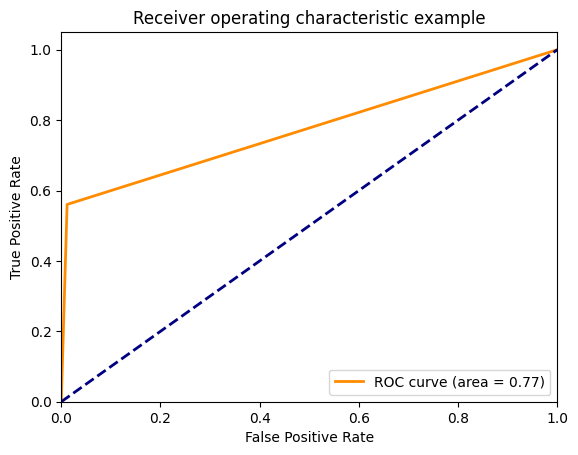

| epoch   2 |   500/ 1519 batches | accuracy    0.940 | loss    0.180
| epoch   2 |  1000/ 1519 batches | accuracy    0.938 | loss    0.183
| epoch   2 |  1500/ 1519 batches | accuracy    0.945 | loss    0.182
-----------------------------------------------------------
| end of epoch   2 | time:  9.17s | valid accuracy    0.946 | ROC AUC    0.627
-----------------------------------------------------------


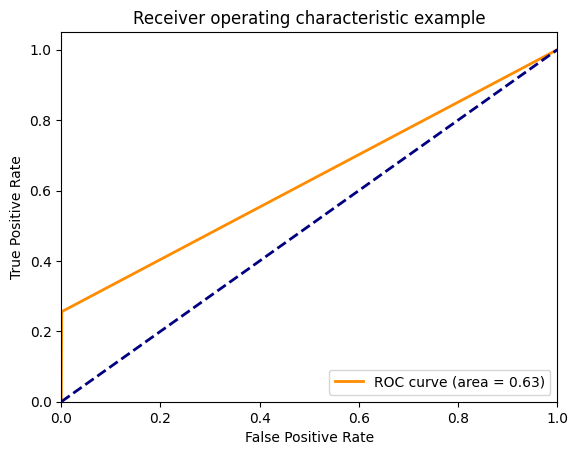

| epoch   3 |   500/ 1519 batches | accuracy    0.959 | loss    0.134
| epoch   3 |  1000/ 1519 batches | accuracy    0.960 | loss    0.133
| epoch   3 |  1500/ 1519 batches | accuracy    0.958 | loss    0.133
-----------------------------------------------------------
| end of epoch   3 | time: 11.15s | valid accuracy    0.946 | ROC AUC    0.774
-----------------------------------------------------------


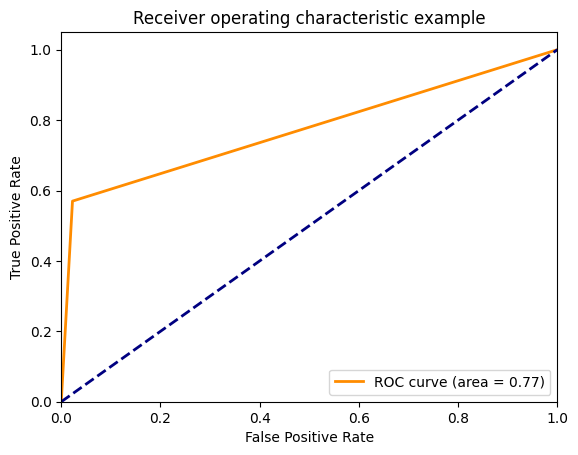

| epoch   4 |   500/ 1519 batches | accuracy    0.959 | loss    0.126
| epoch   4 |  1000/ 1519 batches | accuracy    0.959 | loss    0.126
| epoch   4 |  1500/ 1519 batches | accuracy    0.963 | loss    0.125
-----------------------------------------------------------
| end of epoch   4 | time: 11.30s | valid accuracy    0.960 | ROC AUC    0.761
-----------------------------------------------------------


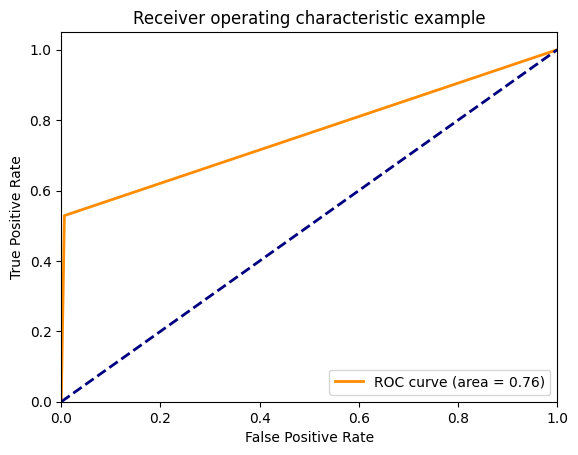

| epoch   5 |   500/ 1519 batches | accuracy    0.960 | loss    0.126
| epoch   5 |  1000/ 1519 batches | accuracy    0.960 | loss    0.125
| epoch   5 |  1500/ 1519 batches | accuracy    0.959 | loss    0.127
-----------------------------------------------------------
| end of epoch   5 | time:  9.30s | valid accuracy    0.953 | ROC AUC    0.765
-----------------------------------------------------------


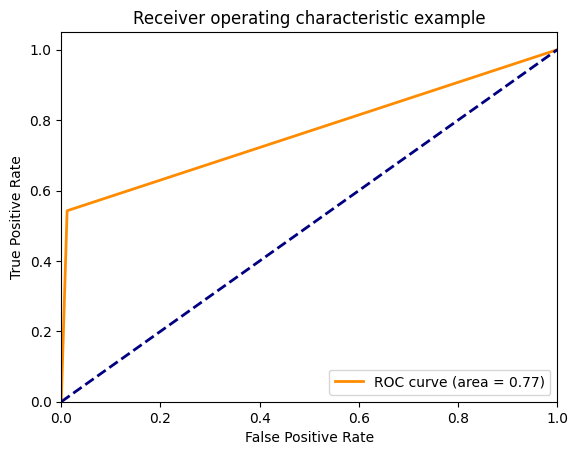

| epoch   6 |   500/ 1519 batches | accuracy    0.963 | loss    0.118
| epoch   6 |  1000/ 1519 batches | accuracy    0.959 | loss    0.123
| epoch   6 |  1500/ 1519 batches | accuracy    0.960 | loss    0.124
-----------------------------------------------------------
| end of epoch   6 | time: 11.09s | valid accuracy    0.957 | ROC AUC    0.755
-----------------------------------------------------------


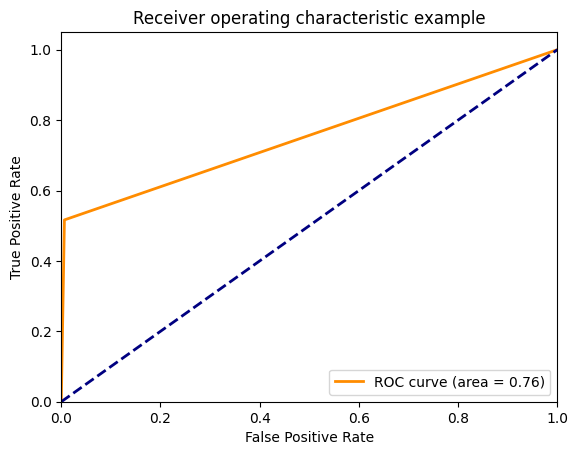

| epoch   7 |   500/ 1519 batches | accuracy    0.963 | loss    0.121
| epoch   7 |  1000/ 1519 batches | accuracy    0.958 | loss    0.124
| epoch   7 |  1500/ 1519 batches | accuracy    0.961 | loss    0.125
-----------------------------------------------------------
| end of epoch   7 | time: 11.09s | valid accuracy    0.960 | ROC AUC    0.761
-----------------------------------------------------------


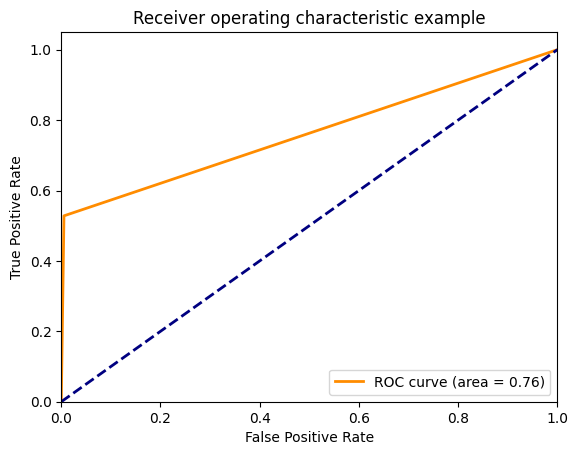

| epoch   8 |   500/ 1519 batches | accuracy    0.961 | loss    0.125
| epoch   8 |  1000/ 1519 batches | accuracy    0.959 | loss    0.126
| epoch   8 |  1500/ 1519 batches | accuracy    0.962 | loss    0.124
-----------------------------------------------------------
| end of epoch   8 | time:  9.42s | valid accuracy    0.959 | ROC AUC    0.763
-----------------------------------------------------------


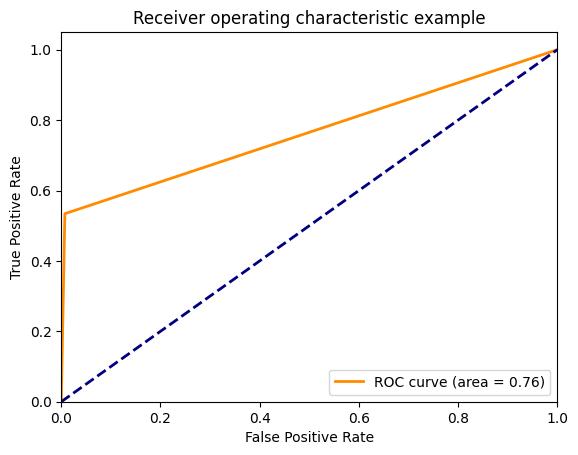

| epoch   9 |   500/ 1519 batches | accuracy    0.959 | loss    0.130
| epoch   9 |  1000/ 1519 batches | accuracy    0.962 | loss    0.129
| epoch   9 |  1500/ 1519 batches | accuracy    0.961 | loss    0.126
-----------------------------------------------------------
| end of epoch   9 | time: 11.35s | valid accuracy    0.957 | ROC AUC    0.758
-----------------------------------------------------------


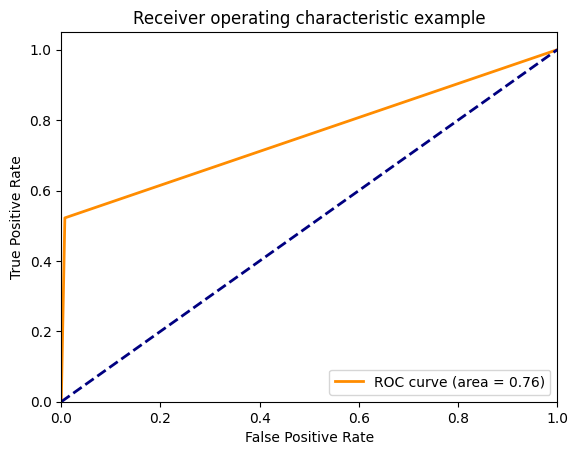

| epoch  10 |   500/ 1519 batches | accuracy    0.960 | loss    0.128
| epoch  10 |  1000/ 1519 batches | accuracy    0.955 | loss    0.135
| epoch  10 |  1500/ 1519 batches | accuracy    0.967 | loss    0.125
-----------------------------------------------------------
| end of epoch  10 | time: 11.71s | valid accuracy    0.956 | ROC AUC    0.746
-----------------------------------------------------------


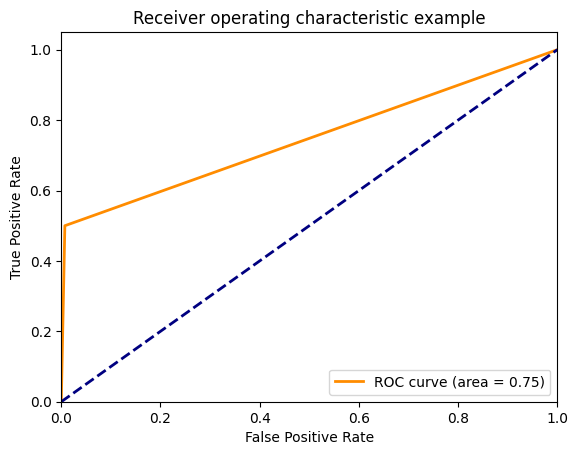

In [ ]:
import time
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import torch.nn.functional as F

def train(dataloader):
    model.train()
    total_acc, total_count = 0, 0
    log_interval = 500
    start_time = time.time()
    losses = []

    # for idx, batch in enumerate(dataloader):
    for idx, (labels, text, offsets) in enumerate(dataloader):
        optimizer.zero_grad()
        outputs = model(text, offsets)
        loss = criterion(outputs, labels)
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), 0.1)
        optimizer.step()
        total_acc += (outputs.argmax(1) == labels).sum().item()
        total_count += labels.size(0)
        losses.append(loss.item())
        if idx % log_interval == 0 and idx > 0:
            elapsed = time.time() - start_time
            print('| epoch {:3d} | {:5d}/{:5d} batches '
                  '| accuracy {:8.3f} | loss {:8.3f}'.format(epoch, idx, len(dataloader),
                                              total_acc/total_count, sum(losses)/ len(losses)))
            total_acc, total_count = 0, 0
            start_time = time.time()

def evaluate(dataloader): 
    model.eval()
    with torch.no_grad():
        correct = 0
        total = 0
        predicted_scores = []
        true_labels = []
        # for batch in test_dataloader:
        for idx, (labels, text, offsets) in enumerate(dataloader):
            outputs = model(text, offsets)
            predicted = torch.round(outputs)
            predicted = outputs.argmax(1)
            predicted_scores.extend(predicted.cpu().numpy())
            true_labels.extend(labels.cpu().numpy())
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    fpr, tpr, thresholds = roc_curve(true_labels, predicted_scores)
    roc_auc = auc(fpr, tpr)
    return correct / total, fpr, tpr, roc_auc

from torch.utils.data.dataset import random_split

# Hyperparameters
EPOCHS = 10 # epoch
LR = 5  # learning rate
BATCH_SIZE = 64 # batch size for training
# criterion = nn.BCELoss()
criterion = nn.CrossEntropyLoss()

total_accu = None
optimizer = torch.optim.SGD(model.parameters(), lr=LR)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, 1.0, gamma=0.1)

df = pd.read_csv("/content/train.csv")
df.to_csv("/content/train.csv", index=False)
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Define the datasets and dataloaders
max_length = 100
train_dataset = TwitterDataset(train_df, max_length)
test_dataset = TwitterDataset(test_df,  max_length)

num_train = int(len(train_dataset) * 0.95)
split_train_, split_valid_ = \
    random_split(train_dataset, [num_train, len(train_dataset) - num_train])

train_dataloader = DataLoader(split_train_, batch_size=16, shuffle=True, collate_fn=collate_batch)
valid_dataloader = DataLoader(split_valid_, batch_size=16, shuffle=True, collate_fn=collate_batch)
test_dataloader = DataLoader(test_dataset, batch_size=16, shuffle=True, collate_fn=collate_batch)

print(len(train_dataloader)) #380 bz 64 1519 bz 16

for epoch in range(1, EPOCHS + 1):
    epoch_start_time = time.time()
    train(train_dataloader)
    accu_val, fpr, tpr, roc_auc = evaluate(valid_dataloader)
    if total_accu is not None and total_accu > accu_val:
        scheduler.step()
    else:
       total_accu = accu_val
    print('-' * 59)
    print('| end of epoch {:3d} | time: {:5.2f}s | '
          'valid accuracy {:8.3f} | ROC AUC {:8.3f}'.format(epoch,
                                           time.time() - epoch_start_time,
                                           accu_val, roc_auc))
    print('-' * 59)
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()


Checking the results of test dataset.
test accuracy    0.943


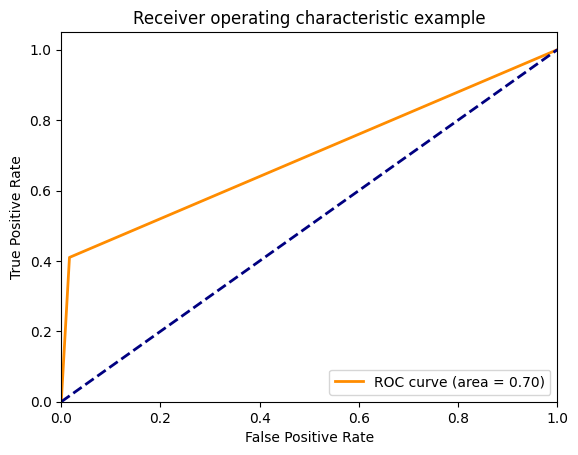

In [ ]:
print('Checking the results of test dataset.')
accu_test, fpr, tpr, roc_auc = evaluate(test_dataloader)
print('test accuracy {:8.3f}'.format(accu_test))

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
          lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

At first, the AUC is 0.5 which means the process is random, despite high accuracy. After I adjust the architecture of this network and the input text embeddings we got better result which is represented by more than 0.5 area.

Reference :  https://www.kaggle.com/code/eisgandar/twitter-sentiment-analysis-hatred-speech/notebook